<a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![MAIA banner](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Aprendizaje_refuerzo_profundo_Banner_V1.png)

# <h1><center>Tarea Tutorial - Semana 1 <a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width="140" align="center"/></a></center></h1>

<center><h1>Aproximación de Funciones</h1></center>

En este tutorial aprenderás acerca de las ventajas que tiene utilizar aproximación de funciones en problemas de aprendizaje por refuerzo profundo. Ilustraremos el proceso con el problema de <a href="https://gymnasium.farama.org/environments/classic_control/cart_pole/">Cart Pole</a>, incluido en las librerías de Gym, e implementaremos redes nuronales con el framework <a href="https://stable-baselines3.readthedocs.io/en/master/index.html">Stable Baselines3</a>, que ya incluye varios algoritmos de aprendizaje por refuerzo. El objetivo principal será comparar el desempeño de distintos algoritmos en su versión tabular y su versión con redes neuronales. Este notebook tutorial se divide en las siguientes secciones:


# Tabla de Contenidos
1. [Objetivos de Aprendizaje](#scrollTo=Objetivos_de_Aprendizaje)  
2. [Marco Teórico](#scrollTo=Marco_Te_rico)  
3. [Instalación de Librerías](#scrollTo=Instalaci_n_de_Librer_as)  
4. [Familiarización con el Entorno de Gym](#scrollTo=Familiarizaci_n_con_el_Entorno_de_Gym)  
5. [Métodos Tabulares](#scrollTo=M_todos_Tabulares)  
6. [Métodos con Redes Neuronales](#scrollTo=M_todos_con_Redes_Neuronales)  
7. [Reflexiones Finales](#scrollTo=Reflexiones_Finales)  
8. [Referencias](#scrollTo=Referencias)

# Objetivos de Aprendizaje  
  
* Implementar algoritmos de aprendizaje por refuerzo de forma exitosa con redes neuronales (Deep Q-Networks).
* Familiarizarse con los entornos de simulación de Gym.
* Identificar las ventajas de implementar aproximación funciones en comparación a utilizar una versión tabular de los algoritmos.


# Marco Teórico  
En el aprendizaje por refuerzo hay dos grandes familias de métodos para encontrar políticas de comportamiento óptimas: los métodos tabulares y los métodos por aproximación de funciones. Entre los métodos tabulares uno de los algoritmos más utilizados es Q-Learning, que encuentra su equivalente con aproximación de funciones mediante redes neuronales en la forma de Deep Q-Networks (DQN).


![Interaccion_agente_ambiente](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Interaccion_agente_ambiente_dF.png)

<center>Figura 1. Interacción de un agente con el ambiente en un problema de aprendizaje por refuerzo.</center>


Recordemos que un ambiente en un problema de aprendizaje por refuerzo está definido por estados, acciones y recompensas. En cada estado $S_t$ el agente toma una acción $A_t$, y tiene cierta probabilidad de pasar a otro estado $S_{t+1}$ y recibir una recompensa $R_{t+1}$. El objetivo del aprendizaje por refuerzo es hallar una política de comportamiento tal que en cada estado el agente escoja la mejor acción posible para maximizar el retorno obtenido a largo plazo. Precisamente, esto es lo que indica la función de valor de pares estado-acción $Q(S_t,A_t)$. La función $Q$ nos dice cuál es el retorno esperado si es un estado $S_t$ se toma una acción $A_t$ siguiendo una política específica $\pi$. Q-Learning funciona como un método iterativo que calcula esta función $Q$ de acuerdo con la siguiente regla de actualización:

<center> $Q(S_t,A_t) \ ← \ Q(S_t,A_t)+α[R_{t+1}+\gamma \underset{a}{\max} Q(S_{t+1},a)-Q(S_t,A_t)]$ &emsp;&emsp;&emsp;$(1)$ </center>

Recuerde que Q-Learning es un algoritmo (<i>off-policy</i>), es decir, que la política que se mejora es distinta a la política que genera el comportamiento. El macroalgoritmo correspondiente se muestra en la Figura 2.

![QLearning_tabular](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/QLearning_tabular_diapositivas_Fernando.png)

<center>Figura 2. Algoritmo de Q-Learning para control de política (versión tabular).</center>

Note que el problema de la versión tabular es que se necesita estimar $Q(S_t,A_t)$ para cada pareja estado-acción. Cuando el problema es muy grande, es decir, que tiene muchos estados y acciones posibles, hay muchas entradas en la tabla que deben actualizarse. Esto no solo ocupa un gran espacio en memoria, sino que también complica la actualización de muchas parejas estado-acción si la exploración no es apropiada y puede demandar una cantidad demasiado grande de cálculos, recursos computacionales y tiempo.  

Por otro lado, en la versión de aproximación de funciones de estos algoritmos, primero hay que definir qué tipo de aproximación se utilizará. En [1] aparecen muchas opciones para aproximar las funciones de valor, entre las cuales se encuentran una versión de parámetros lineales, polinomios, codificación, entre otros. No obstante, la alternativa más utilizada actualmente y probablemente la más útil y robusta, es el uso de redes neuronales profundas. Las redes neuronales permiten estimar funciones modificando la salida a partir de una entrada utilizando pesos asociados a cada neurona y funciones no lineales que, combinadas, pueden reproducir casi cualquier tipo de función si se utilizan suficientes neuronas (y de ahí el término profundas).  

Fue en el año 2013 que Mnih et al. [2] publicaron un paper en el cual se detalla la implementación de redes neuronales profundas para la ejecución del algoritmo de Q-Learning en el aprendizaje de juegos de Atari. En su momento, este paper impuso un nuevo estado del arte, ya que fue la primera vez que se logró trasladar la ventaja de usar redes neuronales que aprendieran de datos sensoriales crudos, como los píxeles de una imágen, al campo de aprendizaje por refuerzo con éxito. En la Figura 3 se muestra el algoritmo propuesto de Deep Q-Networks o DQN:

![DQN](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/DQN_dF.png)


<center>Figura 3. Algoritmo de DQN para control de política.</center>



# Instalación de Librerías  

Corra el siguiente bloque de código para instalar las librerías requeridas en el tutorial. Se encuentra incluído el módulo oficial de <i>Stable Baselines3</i> que ejecuta DQN, y el ambiente de <i>Cart-Pole</i> de <i>Gym</i>. Esta celda puede tardar un par de minutos en ejecutarse completamente la primera vez.


In [ ]:
#Descarga librerías no incluidas en Colab usando pip
!pip install stable_baselines3 #Stable Baselines3 -> Framework de Reinforcement Learning
!pip install gymnasium #Gym -> Contiene ambientes como CartPole
!pip install renderlab #usado para renderizar gym

#Importa estas librerías
import stable_baselines3 #importa Stable Baselines3
from stable_baselines3 import DQN #importa el agente/algoritmo de DQN
from stable_baselines3.common.logger import configure #importa herramientas de logger/debug
from stable_baselines3.common.logger import Logger, CSVOutputFormat, HumanOutputFormat #importa herramientas de logger/debug
from stable_baselines3.common.evaluation import evaluate_policy #importa herramienta de evaluación automática
import gymnasium as gym #importa la libreria de gym con las simulaciones
import renderlab #importa renderlab para los videos

#Importa otras librerías básicas
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import sys

#Limpia los registros generados
from IPython.display import clear_output
clear_output()
print("Todas las librerías han sido instaladas correctamente.")

Todas las librerías han sido instaladas correctamente.


# Familiarización con el Entorno de Gym

El ambiente de Gym de <a href="https://gymnasium.farama.org/environments/classic_control/cart_pole/">Cart Pole</a> consiste de un carrito que debe moverse a la izquierda o a la derecha para intentar balancear un poste que tiene en la parte superior. Puede leer más detalladamente la documentación de este ambiente en los foros oficiales de Gymnasium.

![Observation_space_cartpole](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Observation_space_cartpole.png)

<center>Figura 5. Espacio de observación del ambiente de <i>CartPole</i>. [3]</center>

El ambiente está definido por un estado continuo en 4 dimensiones, que definen posición y velocidad del carrito, y posición y velocidad angular del poste. Por otro lado, sólo hay dos acciones posibles: 0 el carrito se mueve a la izquierda, y 1 el carrito va a la derecha. La meta es evitar que el poste caiga por el mayor tiempo posible, por lo que en cada paso de la simulación que el poste no caiga se obtiene recompensa +1. Si el poste sale del rango [-12°, 12°], el episodio se da por terminado, mientras que si el episodio supera los 500 pasos, se da por truncado; en ambos casos se finaliza la simulación.

Esto quiere decir que el retorno sin descuento máximo que se podría obtener en una simulación es de 500.

## Ejemplo

En el siguiente bloque de código se muestra un ejemplo de cómo se simula un episodio del <i>CartPole</i>. En este caso siempre se toma la acción de ir a la izquierda (0).

In [ ]:
#Ejemplo de simulación de un episodio de CartPole

env_prueba_1 = gym.make("CartPole-v1", render_mode="rgb_array") #Esta línea de código crea el ambiente.
env_prueba_1 = renderlab.RenderFrame(env_prueba_1, "./output") #Esta línea se utiliza para crear una copia que se pueda renderizar con renderlab

obs , info = env_prueba_1.reset() #Se reinicia el estado para comenzar. En obs se almacena el estado observado (continuo, 4 dimensiones)
terminated = False #Inicializa una condición para el loop
truncated = False #Inicializa una condición para el loop
total_reward=0 #Inicializa contador del retorno

while not (terminated or truncated): #Simula hasta que el poste caiga o hasta alcanzar 500 episodios (configuración de CartPole-v1)
  action=0 #Decide una acción. En este caso, siempre va a la izquierda
  obs, reward, terminated, truncated , info = env_prueba_1.step(action) #Con la función step el ambiente da un paso. Se obtiene el estado, recompensa y banderas de información
  total_reward+=reward #Llevamos una cuenta de la recompensa total

print("Recompensa obtenida en el episodio:",total_reward) #Después de terminar el episodio, imprimios la recompensa acumulada total obtenida
print("\n\n")

env_prueba_1.play() #Con esta función se obtiene el video de la simulación

Recompensa obtenida en el episodio: 8.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Puede observar que el retorno obtenido fue de aproximadamente 10. Este valor es muy lejano del ideal 500 discutido anteriormente. Vemos igualmente que el video es muy corto porque falla casi de inmediato la tarea.

## Ejercicio práctico

Para comprobar el entendimiento de la simulación, modifique el ejemplo anterior cambiando la acción. Simule 10 episodios donde la acción sea sólo ir a la derecha y luego 10 episodios donde la acción se escoja aleatoriamente entre izquierda y derecha (recuerde utilizar la función reset() antes de comenzar un nuevo episodio). Calcule después la recompensa total promedio en cada caso y renderiza un video de la última simulación.

In [ ]:
# Simulación de 10 episodios moviéndose siempre a la derecha

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Simulación de 10 episodios moviéndose aleatoriamente a la izquierda o a la derecha

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Simulación de 10 episodios moviéndose siempre a la derecha

for i in range(10): #Repetiremos la misma simulación 10 veces
  obs , info = env_prueba_1.reset() #Se reinicia el estado para comenzar
  terminated = False
  truncated = False
  total_reward=0

  while not (terminated or truncated):
    action=1 #Cambiamos la acción a 1 para siempre ir a la derecha
    obs, reward, terminated, truncated , info = env_prueba_1.step(action)
    total_reward+=reward
  print(f"Recompensa obtenida en el episodio {i+1}:",total_reward)

print("\n\n")
env_prueba_1.play() #Renderiza la última simulación

Recompensa obtenida en el episodio 1: 10.0
Recompensa obtenida en el episodio 2: 9.0
Recompensa obtenida en el episodio 3: 9.0
Recompensa obtenida en el episodio 4: 9.0
Recompensa obtenida en el episodio 5: 10.0
Recompensa obtenida en el episodio 6: 10.0
Recompensa obtenida en el episodio 7: 10.0
Recompensa obtenida en el episodio 8: 10.0
Recompensa obtenida en el episodio 9: 8.0
Recompensa obtenida en el episodio 10: 10.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1742458238.5172095.mp4, 720000 bytes wanted but 0 bytes read,at frame 11/12, at time 0.37/0.37 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Simulación de 10 episodios moviéndose aleatoriamente a la izquierda o a la derecha

for i in range(10): #Repetiremos la misma simulación 10 veces
  obs , info = env_prueba_1.reset() #Se reinicia el estado para comenzar
  terminated = False
  truncated = False
  total_reward=0

  while not (terminated or truncated):
    action=random.randint(0, 1) #la función randint generará aleatoriamente 0 o 1
    obs, reward, terminated, truncated , info = env_prueba_1.step(action)
    total_reward+=reward
  print(f"Recompensa obtenida en el episodio {i+1}:",total_reward)

print("\n\n")
env_prueba_1.play() #Renderiza la última simulación

Recompensa obtenida en el episodio 1: 33.0
Recompensa obtenida en el episodio 2: 75.0
Recompensa obtenida en el episodio 3: 26.0
Recompensa obtenida en el episodio 4: 20.0
Recompensa obtenida en el episodio 5: 23.0
Recompensa obtenida en el episodio 6: 14.0
Recompensa obtenida en el episodio 7: 14.0
Recompensa obtenida en el episodio 8: 14.0
Recompensa obtenida en el episodio 9: 56.0
Recompensa obtenida en el episodio 10: 16.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/18 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1742458241.1717036.mp4, 720000 bytes wanted but 0 bytes read,at frame 17/18, at time 0.57/0.57 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Métodos Tabulares  

Para el análisis de los métodos tabulares, se suministra como base la Clase <i>Learning_CartPole</i>, la cual ya implementa discretización del espacio de estados y acciones, el algoritmo de Q-Learning mostrado en la Figura 2, y métodos para renderizar el ambiente y hacer un análisis de la recompensa por episodio de entrenamiento.


In [ ]:
class Learning_CartPole(object):
    #Esta clase engloba todo el proceso para entrenar un algoritmo de Q-Learning para el ambiente de CartPole-v1
    def __init__(self,gamma,alpha,epsilon,divisions_per_variable=(10,10,10,10)) -> None:
        self.gamma=gamma #factor de descuento
        self.alpha=alpha #tamaño de paso de aprendizaje
        self.epsilon=epsilon #epsilon para políticas epsilon-greedy
        self.env = gym.make('CartPole-v1') #crea un ambiente
        self.env_render = gym.make('CartPole-v1', render_mode = "rgb_array") #crea un ambiente por separado para renderizar
        self.env_render = renderlab.RenderFrame(self.env_render, "./output") #crea un ambiente por separado para renderizar
        self.limits_space_state=[(-4.8,4.8),(-2,2),(-0.418,0.418),(-2,2)] #límites de los estados
        self.divisions_per_variable=divisions_per_variable #discretizacion
        self.TargetPolicy={} #inicializa política objetivo
        self.BehaviorPolicy={} #inicializa política de comportamiento
        self.Q={} #inicializa tabla de Q
        #Define los intervalos y los estados correspondientes
        self.bins = [self.create_bins(self.limits_space_state[i],self.divisions_per_variable[i]-1) for i in range(4)]
        self.states=[]
        for position in self.bins[0]:
          for velocity in self.bins[1]:
            for angle in self.bins[2]:
              for a_vel in self.bins[3]:
                self.states.append((position,velocity,angle,a_vel)) #crea un estado definiendo una tupla de 4 elementos

    def create_bins(self,i,num):
        return np.arange(num+1)*(i[1]-i[0])/num+i[0]

    def discretize_bins(self, x):
        r = tuple((np.digitize(x[i], self.bins[i]) - 1) if x[i] > self.bins[i][-1] else np.digitize(x[i], self.bins[i]) for i in range(4))
        return (self.bins[0][r[0]], self.bins[1][r[1]], self.bins[2][r[2]], self.bins[3][r[3]])

    def PolicyGreedyUpdate(self,state):
      #Esta función actualiza la política target en un único estado haciéndola greedy con respecto al estimativo de Q
       #Parámetro state: estado donde se actualiza la política haciéndola epsilon-greedy
       pi_policy={0:0,1:0}  #inicializa ambas probabilidades en 0
       pi_policy[max(self.Q[state],key=self.Q[state].get)]=1 #para el índice de acción a que maximiza Q(s,a) la probabilidad cambia a 1
       self.TargetPolicy[state]=pi_policy #se actualiza la política en estado state

    def CreateGreedyPolicy(self):
      #Esta función actualiza la política target en un todos sus estados haciéndola greedy con respecto al estimativo de Q
       for s in self.states: #Recorre todos los estados
          self.PolicyGreedyUpdate(s) #Hace la política greedy en ese estado

    def ChooseEpsilonGreedyAction(self,state,q):
      #Esta función escoge qué acción tomar  según una política epsilon-greedy
      #Parámetro state: El estado state donde debe decidir una acción
      #Parámetro q: El estimativo de Q que se tiene en ecuenta para tomar la decisión (Integer 0 o 1)
      #Return: La acción que toma (A)
      aleatorio=random.uniform(0, 1) #genera un número aleatorio entre 0 y 1
      mejor=max(q[state], key=q[state].get) #obtiene el indice de la mejor acción de acuerdo con q
      otras=[0,1] #lista de posibles acciones
      if(aleatorio>=self.epsilon): #si el número escogido es mayor a epsilon
        A=mejor  #toma la mejor acción
      else: #si el número generado es menor a epsilon
        A=random.choice(otras)  #escoge  aleatoriamente de la lista de acciones
      return A #retorna un integer 0 o 1

    def QLearning(self,number_of_episodes):
      #Algoritmo de Q-Learning off-policy
      #Parámetro number_of_episodes: Integer mayor a 0 que indica cuántos episodios generar para usar como muestra
      #Return: una lista con el historial de recompensas por episodio

      self.Q={s:{0:0,1:0} for s in self.states} #inicializa el estimativo de Q en 0 para todas las parejas estado-acción
      training_history=[]  #crea una lista vacía
      for _ in range(number_of_episodes): #itera el número de episodios
        obs , info=self.env.reset()  #reinicia el ambiente y ve el estado
        # print(obs)
        terminated = False #inicializa condición de while
        truncated = False #inicializa condición de while
        S=self.discretize_bins(obs) #discretiza en los estados de la tabla
        # print(S)
        r=0 #inicializa recompensa
        while not (terminated or truncated): #si pierde o trucando en 500
          A=self.ChooseEpsilonGreedyAction(S,self.Q) #elige acción tipi epsilon greedy
          obs, rew, terminated, truncated , info = self.env.step(A)  #toma A, observa recompensa, siguiente estado
          # print(obs)
          next_state=self.discretize_bins(obs)  #discretiza la observación dentro de los estados de la tabla
          # print(next_state)
          Sprima=next_state
          R=rew #Extrae variable
          r=r+R #suma recompensa al total
          self.Q[S][A]=self.Q[S][A]+self.alpha*(R+self.gamma*self.Q[Sprima][max(self.Q[Sprima], key=self.Q[Sprima].get)]-self.Q[S][A]) #ecuación 2
          S=Sprima #siguiente estado
        training_history.append(r)  #por espisodio guarda la recompensa final
      return training_history #retorna lista con recompensas por espisodio


    def ExecutePolicy(self):
        #Esta función ejecuta la política actualmente en Target dentro del ambiente de simulación
        self.CreateGreedyPolicy() #Comienza haciendo la política Target greedy
        obs , info =self.env.reset() #reinicia el ambiente
        S=self.discretize_bins(obs) #discretiza estados
        cumulative_gamma=1 #factor de descuento
        R=0 #en el tiempo inicial la recompensa es 0
        t=0 #Tiempo inicial 0
        terminated = False #inicializa condición de while
        truncated = False #inicializa condición de while
        while not (terminated or truncated): #si pierde o trucando en 500
          left_percentage=self.TargetPolicy[S][0] #probabilidad de escoger izquierda según pi
          rigth_percentage=self.TargetPolicy[S][1] #probabilidad de escoger derecha según pi
          if (left_percentage==1): #caso determinístico izquierda
              action=0
          else: #caso determinístico derecha
              action=1
          t=t+1 #suma tiempo
          obs, rew, terminated, truncated , info = self.env.step(action) #recopila la observación
          next_state=self.discretize_bins(obs) #discretización
          Sprima=next_state #siguiente estado
          R=R+rew*cumulative_gamma #aplica descuento
          cumulative_gamma=cumulative_gamma*self.gamma #halla retorno
          S=Sprima #siguiente estado
        return (R,t) #Retorna recompensa y pasos totales


    def PlayVideo(self):
        #Esta función se crea para mostrar el render de una prueba
        self.CreateGreedyPolicy() #Comienza haciendo la política Target greedy
        obs , info =self.env_render.reset() #reinicia el ambiente (con renderizado)
        S=self.discretize_bins(obs) #discretiza estados
        cumulative_gamma=1 #factor de descuento
        R=0 #en el tiempo inicial la recompensa es 0
        t=0 #Tiempo inicial 0
        terminated = False #inicializa condición de while
        truncated = False #inicializa condición de while
        while not (terminated or truncated): #si pierde o trucando en 500
          left_percentage=self.TargetPolicy[S][0] #probabilidad de escoger izquierda según pi
          rigth_percentage=self.TargetPolicy[S][1] #probabilidad de escoger derecha según pi
          if (left_percentage==1): #caso determinístico izquierda
              action=0
          else: #caso determinístico derecha
              action=1
          t=t+1 #suma tiempo
          obs, rew, terminated, truncated , info = self.env_render.step(action) #recopila la observación
          next_state=self.discretize_bins(obs) #discretización
          Sprima=next_state #siguiente estado
          R=R+rew*cumulative_gamma #aplica descuento
          cumulative_gamma=cumulative_gamma*self.gamma #halla retorno
          S=Sprima #siguiente estado
        print("Reward Video: ",R) #Imprime recompensa del video
        self.env_render.play() #Renderiza


    def Plot_LearningCurve(self,number_of_experiments,number_of_episodes):
      #Esta función toma los datos Q-Learning y grafica apromedio, mínimo, máximo

      experiments = [] #inicializa una lista vacía para guardar los experimentos
      for i in range(number_of_experiments): #ejecuta experimentos
        exp = self.QLearning(number_of_episodes) #Entrana Q-Learning por number_of_episodes. Retorna historial
        experiments.append(exp) #Añade el historial de entrenamiento
        print(f"Completado el experimento {i+1} con {number_of_episodes} episodios simulados.") #Imprime para mostrar avance del entrenamiento

      #Calcula promedios, mínimos y máximos de los entrenamientos
      mean_rewards=[0] * number_of_episodes
      max_rewards=[0] * number_of_episodes
      min_rewards=[600] * number_of_episodes
      for i in range(number_of_experiments):
        for j in range(number_of_episodes):
          mean_rewards[j]=mean_rewards[j]+experiments[i][j]
          if(experiments[i][j]<min_rewards[j]):
            min_rewards[j]=experiments[i][j]
          if(experiments[i][j]>max_rewards[j]):
            max_rewards[j]=experiments[i][j]
      mean_rewards = [n * (1/len(experiments)) for n in mean_rewards]

      #Organiza los datos
      listas = {
          "x": [j for j in range(number_of_episodes)],
          "Promedio":mean_rewards,
          "min": min_rewards,
          "max": max_rewards,
      }
      df = pd.DataFrame(listas)

      #Grafica
      fig, axs = plt.subplots(1, 2, figsize=(20, 5))
      axs[0].grid(alpha=0.3)
      axs[0].plot(mean_rewards, color='red', label="Promedio")
      axs[0].set_ylabel('Recompensa obtenida (Duración del episodio)')
      axs[0].set_xlabel('Número de episodios')
      axs[0].legend()
      axs[1].grid(alpha=0.3)
      axs[1].plot(mean_rewards, color='red', label="Promedio")
      axs[1].fill_between(x='x',y1='min',y2='max', data=df, color='green',alpha = 0.225, label="Máximos y Mínimos")
      axs[1].set_ylabel('Recompensa obtenida (Duración del episodio)')
      axs[1].set_xlabel('Número de episodios')
      axs[1].legend()
      plt.suptitle("Curva de aprendizaje obtenida en "+str(number_of_experiments)+" experimentos de Q-Learning con una discretización de "+str(len(self.states))+" estados.")
      plt.tight_layout()
      plt.show()

      return mean_rewards #Retorna los datos de recompensa promedio

## Ejemplo de uso

Como se mencionó anteriormente, el estado está descrito por 4 números que pueden tomar valores continuos en un rango predeterminado. Pero, para utilizar el algoritmo de Q-Learning necesitamos tener valores discretos para calcular la función $Q$. Hay que decidir entonces en cuántos intervalos dividir cada variable de observación, modificando la cantidad de entradas totales de la tabla. En el siguiente bloque de código se ejemplifica el proceso de discretización y evolución del entrenamiento.

El primer paso será crear un ambiente con un espacio de observación dividido en $x$ cantidad de estados. La cantidad de estados será el producto de las divisiones que decidamos arbitrariamente para cada variable de estado. Para este ejemplo, arbitrariamente, establezcamos que <i>cart position</i> la dividiremos en 2 intervalos, <i>cart velocity</i> en 4, <i>pole angle</i> en 4 y <i>pole angular velocity</i> en 2. Tendremos entonces en total $2*4*4*2=64$ estados posibles.

Adicionalmente, fijaremos unos hiperparámetros para el algoritmo de Q-Learning. Si observamos la Figura 2, debemos elegir $\gamma$, $ \epsilon$ y $\alpha$. $\gamma$ es el factor de descuento, que determina qué tan importante serán las recompensas antiguas y qué tan valiosas serán las recompensas más recientes; para este problema, como nos interesa que mantenga el equilibrio en todo momento, mantendremos siempre $\gamma=1$ (sin descuento). Por otro lado, $\epsilon$ marca la probabilidad con la que se escogen acciones "no óptimas", lo cual modificará la tasa de exploración; un $\epsilon$ muy bajo hará que el agente no explore suficientes alternativas, mientras que un $\epsilon$ muy grande hará que escoja acciones incorrectas de forma innecesaria. Finalmente, $\alpha$ es la tasa de aprendizaje, es un tamaño de paso en la actualización de la función $Q$; un $\alpha$ muy pequeño hace lento el aprendizaje, pero un $\alpha$ muy grande puede hacerlo inestable porque le da demasiado peso a cada observación. En este ejemplo se utilizará $\epsilon=0.1$ y $\alpha=0.1$.

Luego se utiliza la función <i>Plot_LearningCurve</i> para realizar el entrenamiento y el posterior análisis. Se pasa por parámetro el número de experimentos y el número de episodios por entrenamiento. Recuerde: un episodio se cuenta desde que inicia la simulación hasta que se da la condición de truncated o terminated, y un experimento será cuando se completa cierta cantidad de episodios. El número de experimentos corresponde entonces a cuántas veces se va a repetir el entrenamiento para calcular una recompensa promedio, mientras que el número de episodios es por cuántos episodios se va a entrenar cada experimento con el algoritmo de Q-Learning. Podemos hacer en este caso 10 experimentos y variar el número de episodios; en este ejemplo se usarán 10,000 de episodios por experimento. Con esta selección el siguiente entrenamiento debe durar un poco menos de 2 minutos.  

In [ ]:
def Train_Test_QLearning(divisions_per_variable,number_of_experiments,number_of_episodes,alpha,epsilon):
  #TRAIN
  print("--------------TRAIN--------------")
  #Creación del agente. Se pasa a la clase los hiperparámetros, el nombre del ambiente, y una tupla de 4 elementos con la discretización por variable
  Agente=Learning_CartPole(gamma=1,alpha=alpha,epsilon=epsilon,divisions_per_variable=divisions_per_variable)

  #Revisamos los estados discretizados
  print("El espacio de observación ha sido discretizado de la siguiente forma:")
  print(Agente.bins)
  print("El total de estados es:",len(Agente.states))

  #Se utiliza la función "Plot_LearningCurve" para realizar el entrenamiento y también para realizar el análisis
  mean_reward=Agente.Plot_LearningCurve(number_of_experiments=number_of_experiments,number_of_episodes=number_of_episodes)

  #TEST
  print("---------------TEST---------------")
  test_total_reward=0 #un contador donde se sumarán todas las recompensas obtenidas
  test_episodes=10 #

  for i in range(test_episodes): #simulará los episodios
    R,t=Agente.ExecutePolicy() #La función ExecutePolicy ya proporcionada simula un episodio completo. Retorna la recompensa total y la cantidad de pasos simulados
    test_total_reward += R #suma el retorno
    print("Total Reward episodio {}: {}".format(i+1, R)) #Imprime el retorno obtenido en el episodio i

  test_mean_reward= test_total_reward/test_episodes #Calcula la recompensa promedio
  print("Recompensa promedio sobre {} episodios: {}".format(test_episodes,test_mean_reward)) #imprime la recompensa promedio

  Agente.PlayVideo() #La función realiza una simulación adicional y muestra el video

Para hacer el entreamiento y validación, puede utilizar la anterior función, cuyo uso se demuestra a continuación:

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8,  4.8]), array([-2.        , -0.66666667,  0.66666667,  2.        ]), array([-0.418     , -0.13933333,  0.13933333,  0.418     ]), array([-2.,  2.])]
El total de estados es: 64
Completado el experimento 1 con 2000 episodios simulados.
Completado el experimento 2 con 2000 episodios simulados.
Completado el experimento 3 con 2000 episodios simulados.
Completado el experimento 4 con 2000 episodios simulados.
Completado el experimento 5 con 2000 episodios simulados.
Completado el experimento 6 con 2000 episodios simulados.
Completado el experimento 7 con 2000 episodios simulados.
Completado el experimento 8 con 2000 episodios simulados.
Completado el experimento 9 con 2000 episodios simulados.
Completado el experimento 10 con 2000 episodios simulados.


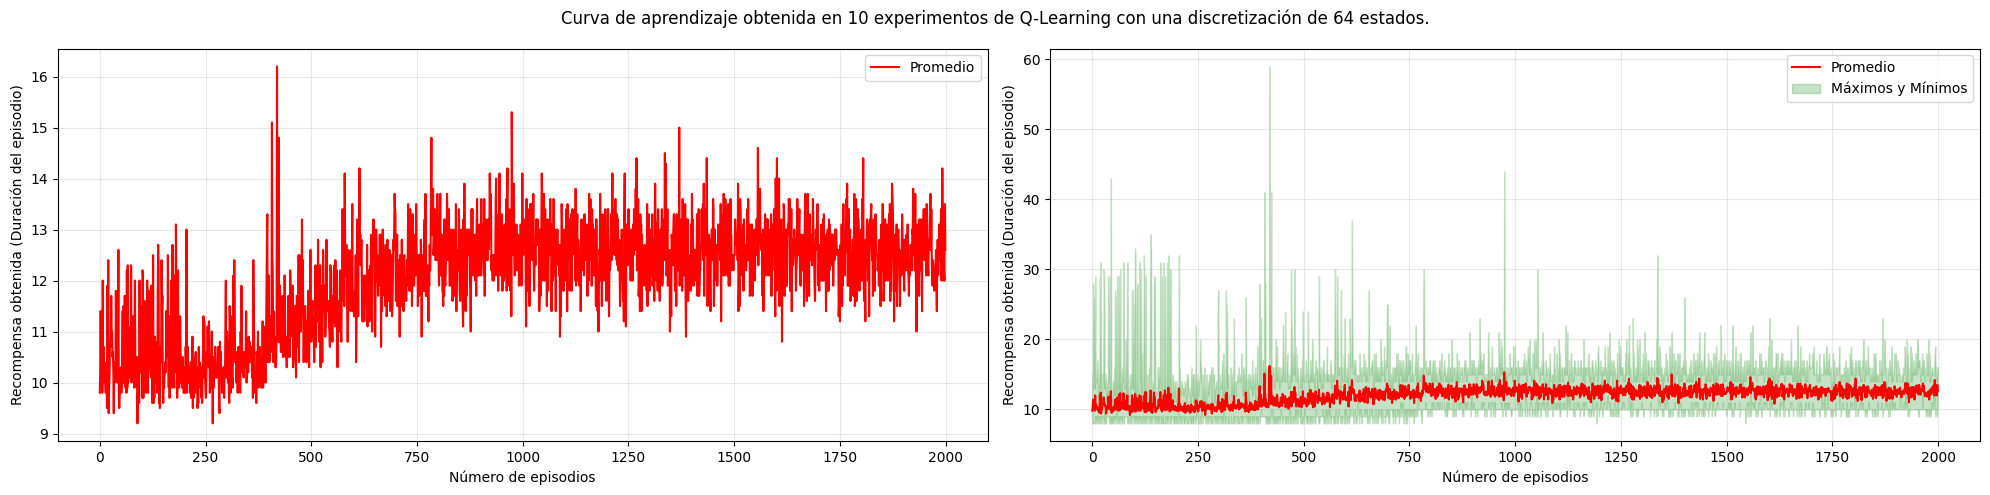

---------------TEST---------------
Total Reward episodio 1: 14.0
Total Reward episodio 2: 11.0
Total Reward episodio 3: 14.0
Total Reward episodio 4: 15.0
Total Reward episodio 5: 14.0
Total Reward episodio 6: 13.0
Total Reward episodio 7: 9.0
Total Reward episodio 8: 13.0
Total Reward episodio 9: 13.0
Total Reward episodio 10: 13.0
Recompensa promedio sobre 10 episodios: 12.9
Reward Video:  13.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/15 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1742458264.748405.mp4, 720000 bytes wanted but 0 bytes read,at frame 14/15, at time 0.47/0.47 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
#Ejemplo de Q-Learning tabular con una discretización de 64 estados y entrenamiento por 2000 episodios
Train_Test_QLearning(divisions_per_variable=(2,4,4,2),number_of_experiments=10,number_of_episodes=2000,alpha=0.1,epsilon=0.1)

## Ejercicio práctico

En el anterior ejemplo la discretización es muy burda. Con tan sólo 64 estados probablemente nunca se logre conseguir un buen entrenamiento, aún con una gran cantidad de episodios (observando cómo se estancó la recompensa en la gráfica anterior). Ahora usted mismo modifique:

*   Discretización del espacio de observación.
*   Número de episodios para el entrenamiento.
*   Valor del hiperparámetro $\alpha$.
*   Valor del hiperparámetro $\epsilon$.

Mientras mejor sea la discretización del espacio, mejor debería ser el entrenamiento, pero también es posible que requiera una mayor cantidad de episodios. Se recomienda variar la discretización entre 300 y 3,000 estados, y cambiar el número de episodios entre 1,000 y 10,000. Realice varias pruebas que le permitan concluir acerca del tiempo de ejecución y la recompensa obtenida en función de la discretización y la cantidad de episodios de entrenamiento.

In [ ]:
# Train y Test Q-Learning con discretización de X estados y X episodios por entrenamiento

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test Q-Learning con discretización de X estados y X episodios por entrenamiento

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test Q-Learning con discretización de X estados y X episodios por entrenamiento

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8, -1.6,  1.6,  4.8]), array([-2., -1.,  0.,  1.,  2.]), array([-0.418, -0.209,  0.   ,  0.209,  0.418]), array([-2.        , -0.66666667,  0.66666667,  2.        ])]
El total de estados es: 400
Completado el experimento 1 con 2000 episodios simulados.
Completado el experimento 2 con 2000 episodios simulados.
Completado el experimento 3 con 2000 episodios simulados.
Completado el experimento 4 con 2000 episodios simulados.
Completado el experimento 5 con 2000 episodios simulados.
Completado el experimento 6 con 2000 episodios simulados.
Completado el experimento 7 con 2000 episodios simulados.
Completado el experimento 8 con 2000 episodios simulados.
Completado el experimento 9 con 2000 episodios simulados.
Completado el experimento 10 con 2000 episodios simulados.


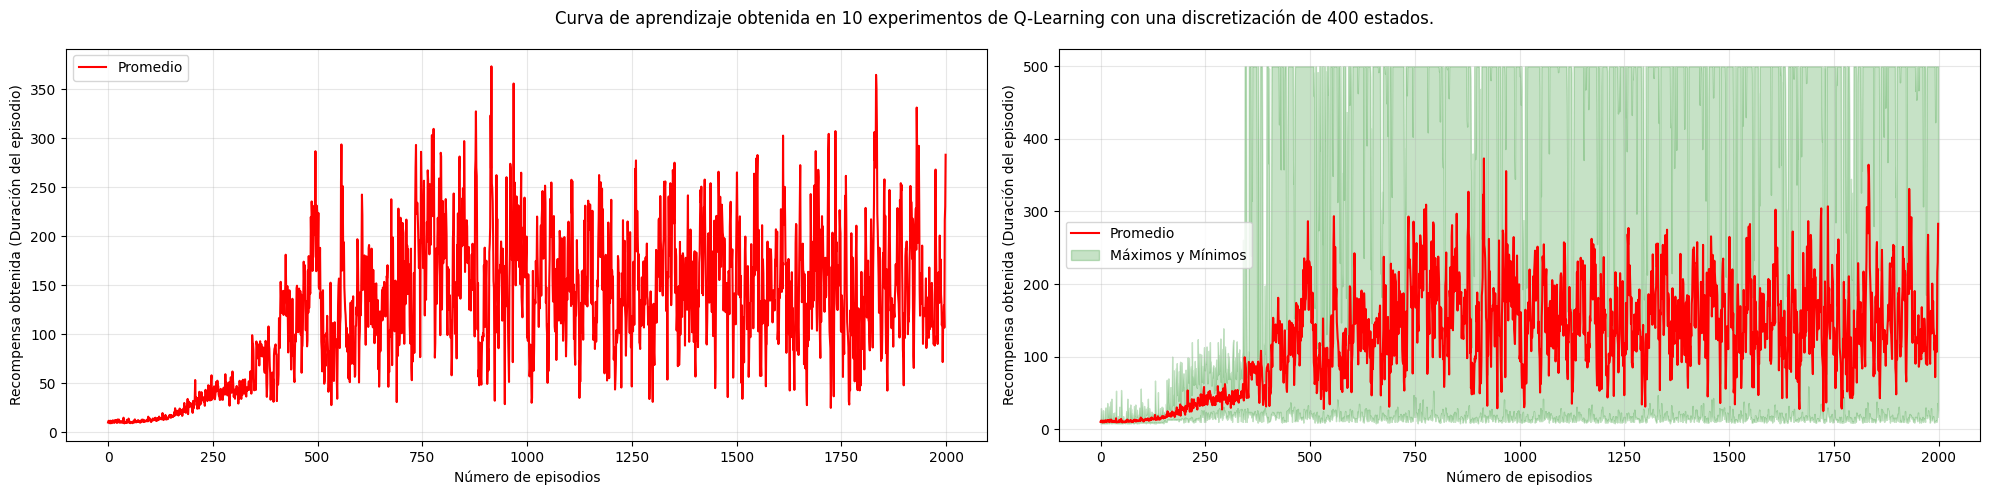

---------------TEST---------------
Total Reward episodio 1: 115.0
Total Reward episodio 2: 30.0
Total Reward episodio 3: 33.0
Total Reward episodio 4: 32.0
Total Reward episodio 5: 24.0
Total Reward episodio 6: 116.0
Total Reward episodio 7: 82.0
Total Reward episodio 8: 50.0
Total Reward episodio 9: 26.0
Total Reward episodio 10: 68.0
Recompensa promedio sobre 10 episodios: 57.6
Reward Video:  27.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test Q-Learning con discretización de 400 estados y 2,000 episodios por entrenamiento
Train_Test_QLearning(divisions_per_variable=(4,5,5,4),number_of_experiments=10,number_of_episodes=2000,alpha=0.1,epsilon=0.1)

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8, -2.4,  0. ,  2.4,  4.8]), array([-2., -1.,  0.,  1.,  2.]), array([-0.418, -0.209,  0.   ,  0.209,  0.418]), array([-2., -1.,  0.,  1.,  2.])]
El total de estados es: 625
Completado el experimento 1 con 2000 episodios simulados.
Completado el experimento 2 con 2000 episodios simulados.
Completado el experimento 3 con 2000 episodios simulados.
Completado el experimento 4 con 2000 episodios simulados.
Completado el experimento 5 con 2000 episodios simulados.
Completado el experimento 6 con 2000 episodios simulados.
Completado el experimento 7 con 2000 episodios simulados.
Completado el experimento 8 con 2000 episodios simulados.
Completado el experimento 9 con 2000 episodios simulados.
Completado el experimento 10 con 2000 episodios simulados.


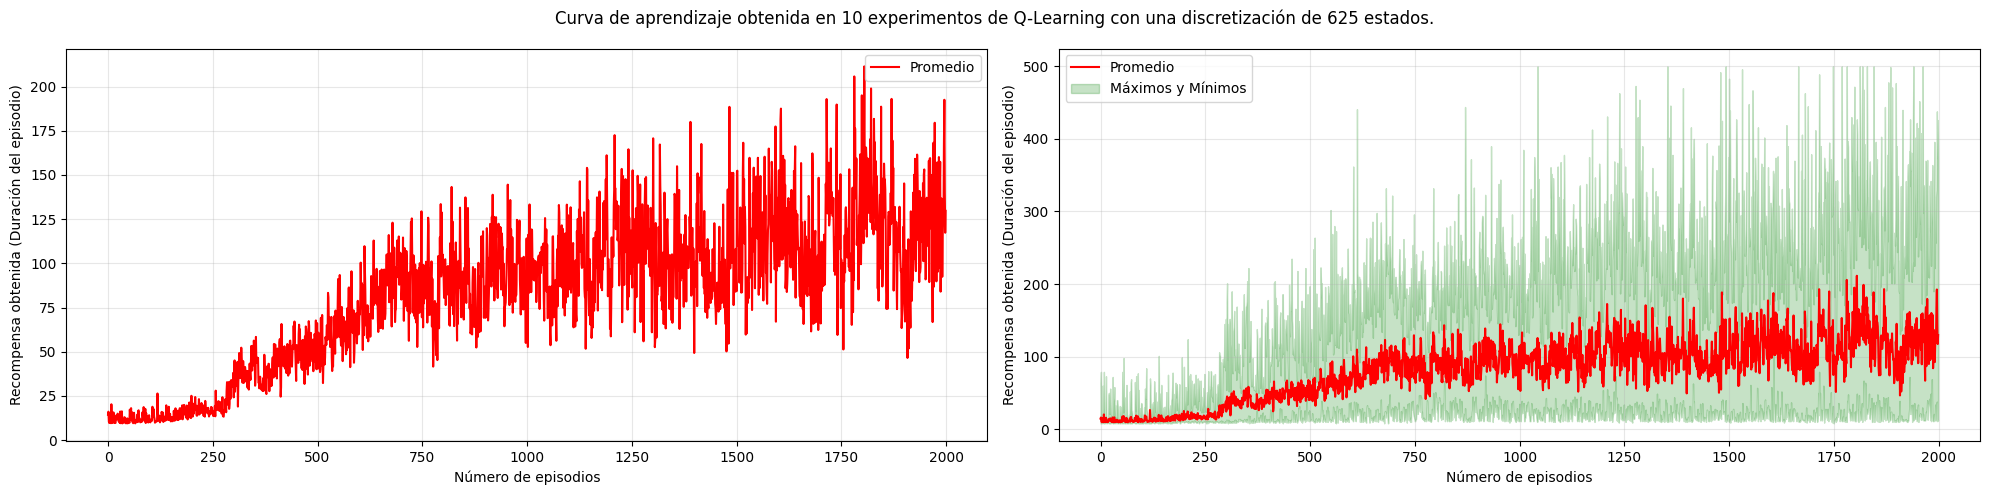

---------------TEST---------------
Total Reward episodio 1: 48.0
Total Reward episodio 2: 96.0
Total Reward episodio 3: 29.0
Total Reward episodio 4: 111.0
Total Reward episodio 5: 36.0
Total Reward episodio 6: 59.0
Total Reward episodio 7: 44.0
Total Reward episodio 8: 130.0
Total Reward episodio 9: 45.0
Total Reward episodio 10: 39.0
Recompensa promedio sobre 10 episodios: 63.7
Reward Video:  57.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test Q-Learning con discretización de 625 estados y 2,000 episodios por entrenamiento
Train_Test_QLearning(divisions_per_variable=(5,5,5,5),number_of_experiments=10,number_of_episodes=2000,alpha=0.1,epsilon=0.1)

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8]), array([-2.        , -1.42857143, -0.85714286, -0.28571429,  0.28571429,
        0.85714286,  1.42857143,  2.        ]), array([-0.418     , -0.29857143, -0.17914286, -0.05971429,  0.05971429,
        0.17914286,  0.29857143,  0.418     ]), array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])]
El total de estados es: 3136
Completado el experimento 1 con 2000 episodios simulados.
Completado el experimento 2 con 2000 episodios simulados.
Completado el experimento 3 con 2000 episodios simulados.
Completado el experimento 4 con 2000 episodios simulados.
Completado el experimento 5 con 2000 episodios simulados.
Completado el experimento 6 con 2000 episodios simulados.
Completado el experimento 7 con 2000 episodios simulados.
Completado el experimento 8 con 2000 episodios simulados.
Comp

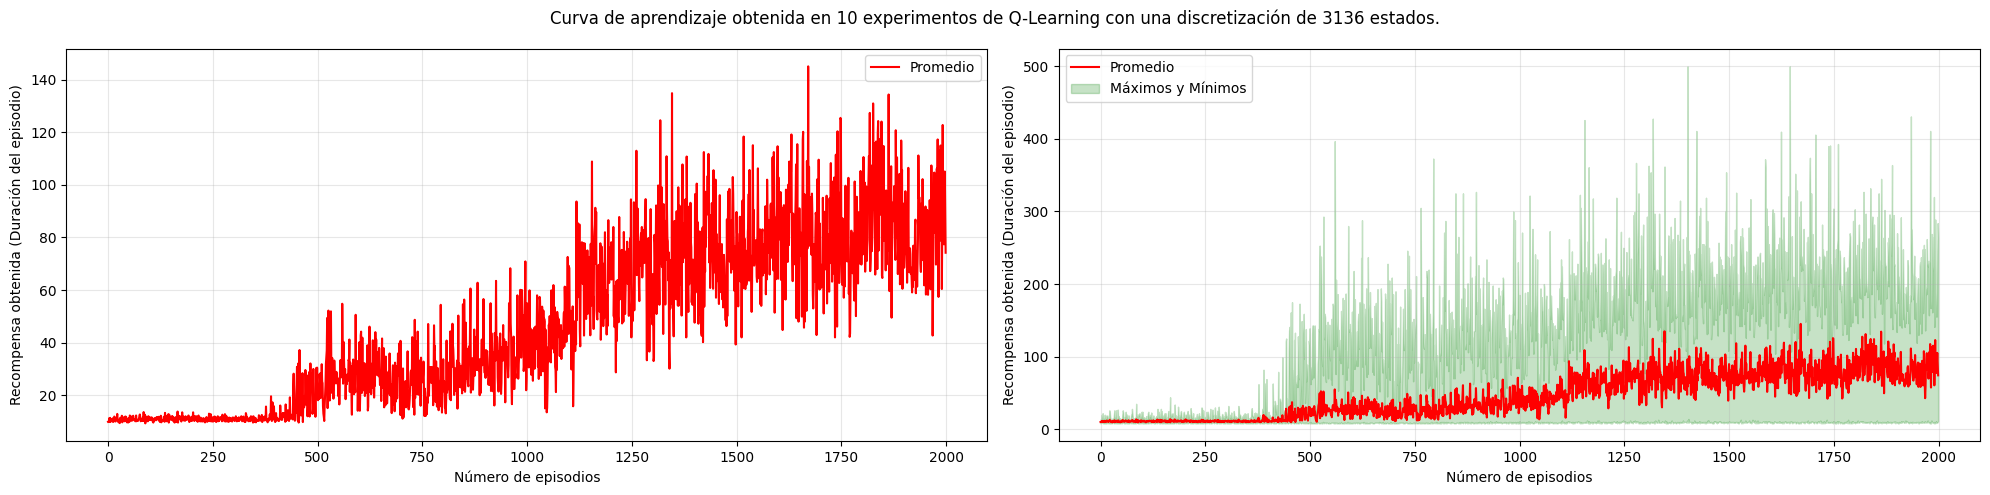

---------------TEST---------------
Total Reward episodio 1: 202.0
Total Reward episodio 2: 148.0
Total Reward episodio 3: 142.0
Total Reward episodio 4: 140.0
Total Reward episodio 5: 123.0
Total Reward episodio 6: 148.0
Total Reward episodio 7: 136.0
Total Reward episodio 8: 59.0
Total Reward episodio 9: 77.0
Total Reward episodio 10: 135.0
Recompensa promedio sobre 10 episodios: 131.0
Reward Video:  81.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test Q-Learning con discretización de 3136 estados y 2,000 episodios por entrenamiento
Train_Test_QLearning(divisions_per_variable=(7,8,8,7),number_of_experiments=10,number_of_episodes=2000,alpha=0.1,epsilon=0.1)

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8, -1.6,  1.6,  4.8]), array([-2., -1.,  0.,  1.,  2.]), array([-0.418, -0.209,  0.   ,  0.209,  0.418]), array([-2.        , -0.66666667,  0.66666667,  2.        ])]
El total de estados es: 400
Completado el experimento 1 con 10000 episodios simulados.
Completado el experimento 2 con 10000 episodios simulados.
Completado el experimento 3 con 10000 episodios simulados.
Completado el experimento 4 con 10000 episodios simulados.
Completado el experimento 5 con 10000 episodios simulados.
Completado el experimento 6 con 10000 episodios simulados.
Completado el experimento 7 con 10000 episodios simulados.
Completado el experimento 8 con 10000 episodios simulados.
Completado el experimento 9 con 10000 episodios simulados.
Completado el experimento 10 con 10000 episodios simulados.


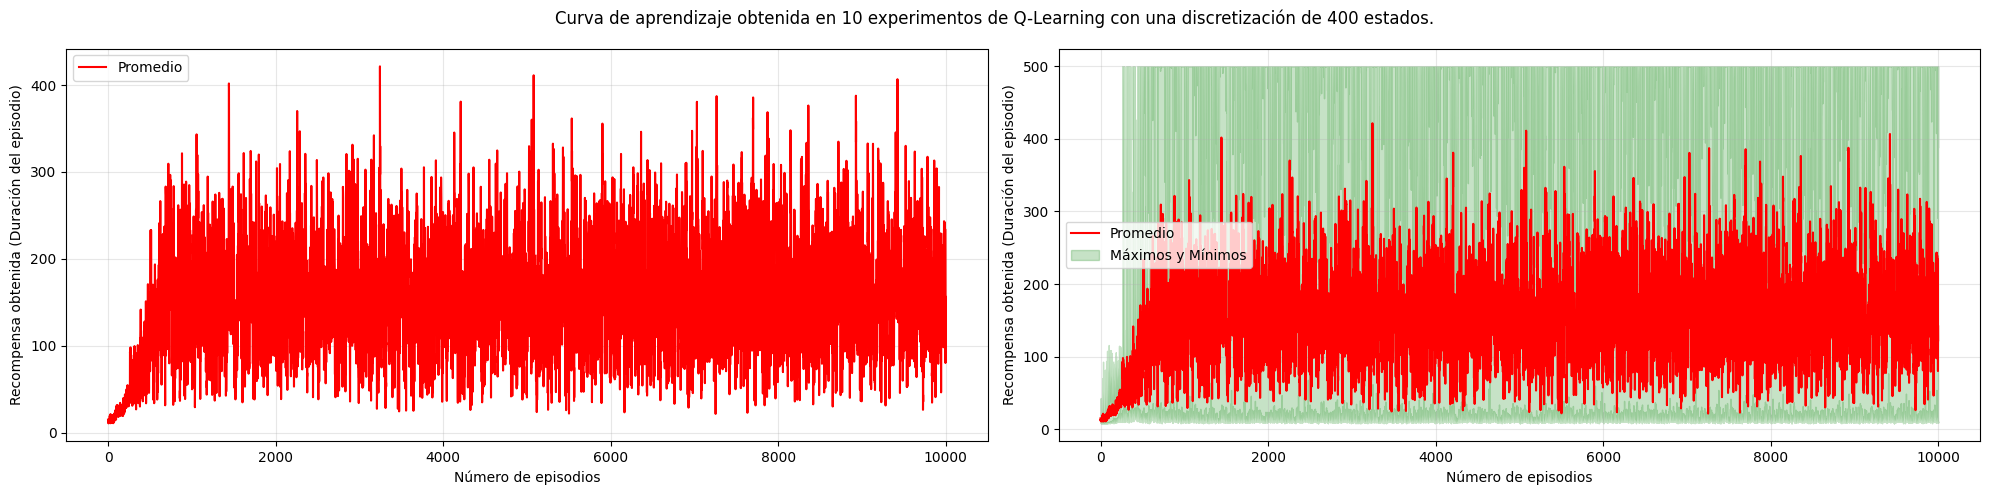

---------------TEST---------------
Total Reward episodio 1: 17.0
Total Reward episodio 2: 13.0
Total Reward episodio 3: 19.0
Total Reward episodio 4: 16.0
Total Reward episodio 5: 18.0
Total Reward episodio 6: 17.0
Total Reward episodio 7: 14.0
Total Reward episodio 8: 21.0
Total Reward episodio 9: 15.0
Total Reward episodio 10: 19.0
Recompensa promedio sobre 10 episodios: 16.9
Reward Video:  15.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test Q-Learning con discretización de 400 estados y 10,000 episodios por entrenamiento
Train_Test_QLearning(divisions_per_variable=(4,5,5,4),number_of_experiments=10,number_of_episodes=10000,alpha=0.1,epsilon=0.1)

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8, -2.4,  0. ,  2.4,  4.8]), array([-2., -1.,  0.,  1.,  2.]), array([-0.418, -0.209,  0.   ,  0.209,  0.418]), array([-2., -1.,  0.,  1.,  2.])]
El total de estados es: 625
Completado el experimento 1 con 10000 episodios simulados.
Completado el experimento 2 con 10000 episodios simulados.
Completado el experimento 3 con 10000 episodios simulados.
Completado el experimento 4 con 10000 episodios simulados.
Completado el experimento 5 con 10000 episodios simulados.
Completado el experimento 6 con 10000 episodios simulados.
Completado el experimento 7 con 10000 episodios simulados.
Completado el experimento 8 con 10000 episodios simulados.
Completado el experimento 9 con 10000 episodios simulados.
Completado el experimento 10 con 10000 episodios simulados.


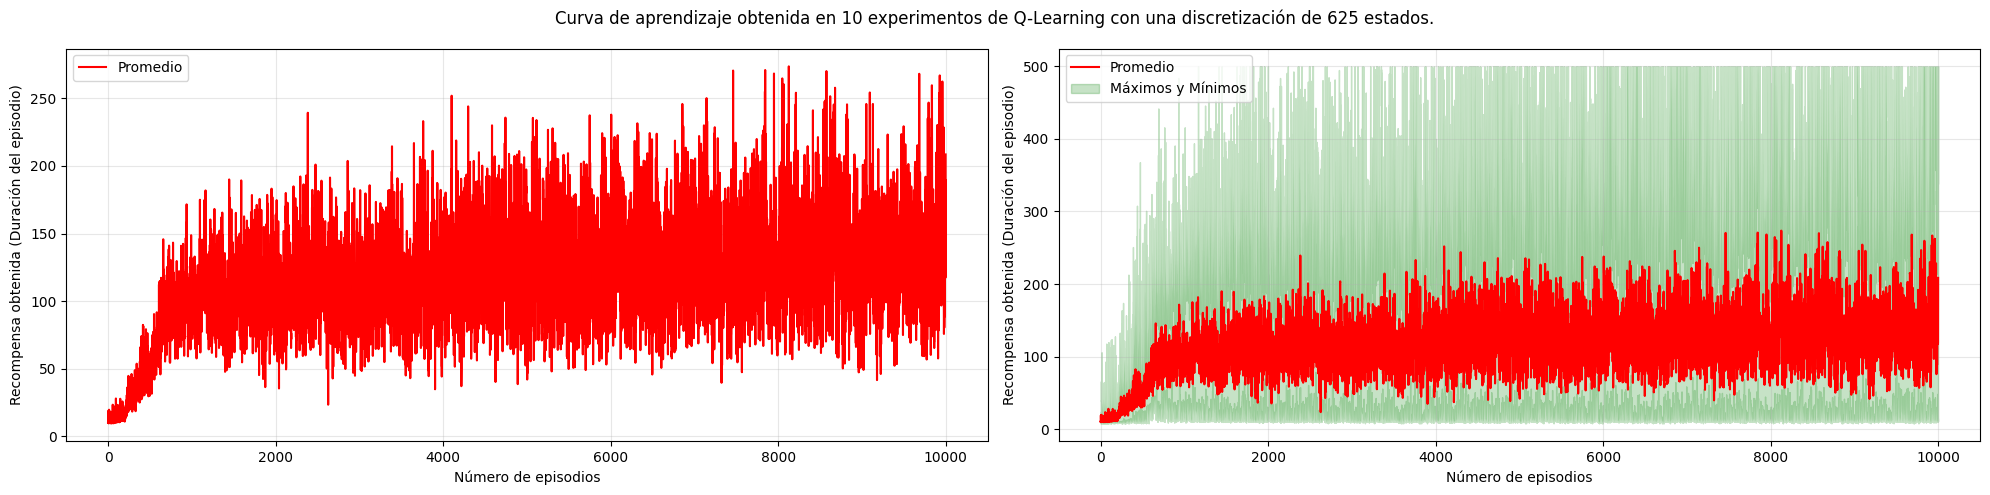

---------------TEST---------------
Total Reward episodio 1: 215.0
Total Reward episodio 2: 135.0
Total Reward episodio 3: 253.0
Total Reward episodio 4: 161.0
Total Reward episodio 5: 156.0
Total Reward episodio 6: 214.0
Total Reward episodio 7: 164.0
Total Reward episodio 8: 220.0
Total Reward episodio 9: 324.0
Total Reward episodio 10: 147.0
Recompensa promedio sobre 10 episodios: 198.9
Reward Video:  221.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test Q-Learning con discretización de 625 estados y 10,000 episodios por entrenamiento
Train_Test_QLearning(divisions_per_variable=(5,5,5,5),number_of_experiments=10,number_of_episodes=10000,alpha=0.1,epsilon=0.1)

--------------TRAIN--------------
El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8]), array([-2.        , -1.42857143, -0.85714286, -0.28571429,  0.28571429,
        0.85714286,  1.42857143,  2.        ]), array([-0.418     , -0.29857143, -0.17914286, -0.05971429,  0.05971429,
        0.17914286,  0.29857143,  0.418     ]), array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])]
El total de estados es: 3136
Completado el experimento 1 con 10000 episodios simulados.
Completado el experimento 2 con 10000 episodios simulados.
Completado el experimento 3 con 10000 episodios simulados.
Completado el experimento 4 con 10000 episodios simulados.
Completado el experimento 5 con 10000 episodios simulados.
Completado el experimento 6 con 10000 episodios simulados.
Completado el experimento 7 con 10000 episodios simulados.
Completado el experimento 8 con 10000 episodios simulad

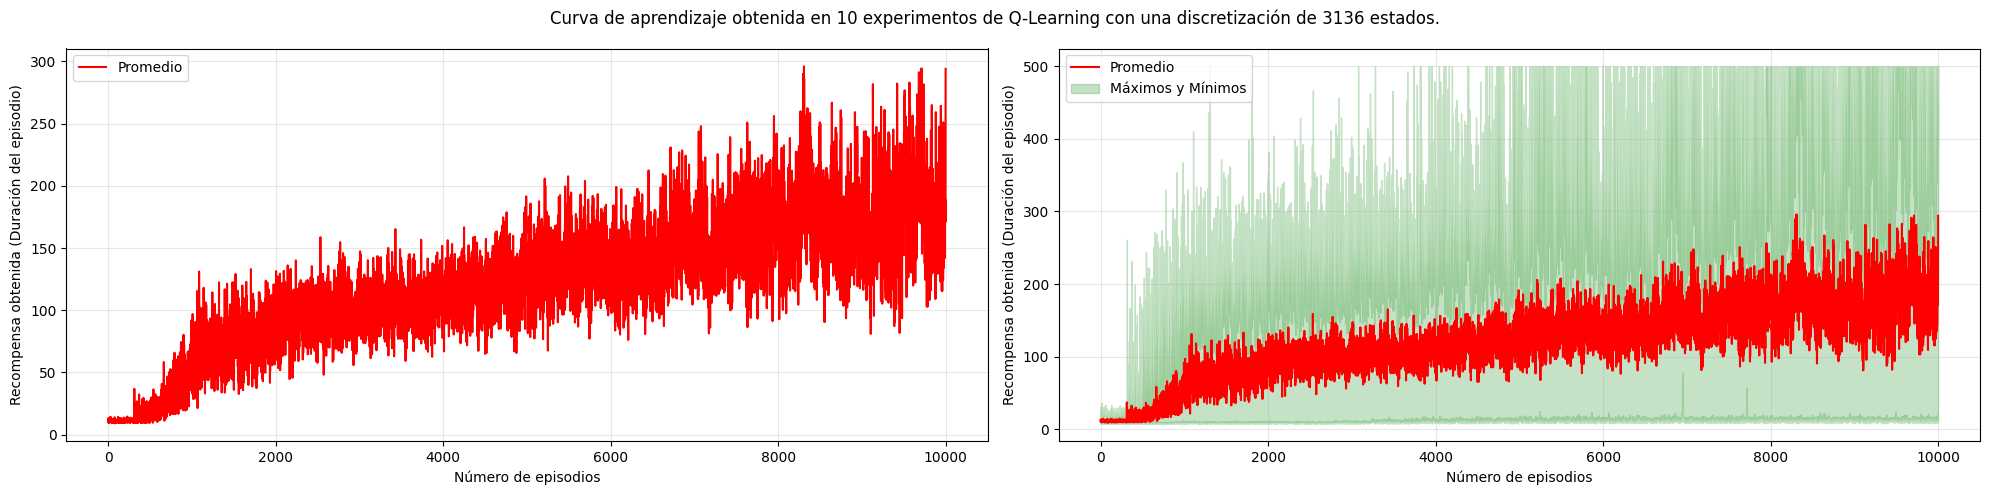

---------------TEST---------------
Total Reward episodio 1: 321.0
Total Reward episodio 2: 418.0
Total Reward episodio 3: 344.0
Total Reward episodio 4: 500.0
Total Reward episodio 5: 500.0
Total Reward episodio 6: 413.0
Total Reward episodio 7: 500.0
Total Reward episodio 8: 344.0
Total Reward episodio 9: 396.0
Total Reward episodio 10: 406.0
Recompensa promedio sobre 10 episodios: 414.2
Reward Video:  274.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  96%|█████████▌| 264/276 [00:01<00:00, 119.62it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1742460706.903247.mp4, 720000 bytes wanted but 0 bytes read,at frame 275/276, at time 9.17/9.17 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test Q-Learning con discretización de 3136 estados y 10,000 episodios por entrenamiento
Train_Test_QLearning(divisions_per_variable=(7,8,8,7),number_of_experiments=10,number_of_episodes=10000,alpha=0.1,epsilon=0.1)

# Métodos con Redes Neuronales  

Ahora realizaremos el entrenamiento utilizando aproximación de funciones con redes neuronales en lugar de una discretización del espacio de observación.


## Ejemplo de uso

En este ejemplo se utiliza la librería <a href="https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html">Stable Baselines3</a>, con la cual se pueden crear redes neuronales de forma sencilla y utilizar algoritmos ya implementados. Al igual que en la parte tabular de este cuaderno, se propone una función que ya encapsula el proceso de creación del modelo, entrenamiento, validación y renderizado.

En la primera parte de la función se crea el ambiente de <i>Cart Pole</i> como ya se hizo anteriormente. Luego, se define con un diccionario la arquitectura de red neuronal que se va a utilizar. En este caso, con <i>Stable Baselines3</i> únicamente es necesario especificar la cantidad de neuronas que tendrán capas escondidas organizadas de forma secuencial. Para este ejemplo, manejaremos únicamente dos capas, cuya cantidad de neuronas es independiente y se pasa por parámetro a la función. Luego, con la función DQN de <i>Stable Baselines3</i> se crea el agente y también se pueden modificar algunos parámetros del entrenamiento.

Para el entrenamiento, sólo se necesita especificar cuántos pasos de tiempo se utilizarán en la simulación. Tenga en cuenta que un paso de tiempo es una única iteración dentro de los episodios, no los confunda con el número de episodios.

Adicionalmente, durante el entrenamiento se va a guardar como variable local un archivo .csv que contendrá algunas métricas del entrenamiento. El nombre del .csv se pasa por parámetro, y el nombre también será utilizado al final para guardar el modelo entrenado, que puede ser posteriormente cargado. La función ya incluye también una gráfica de la recompensa promedio obtenida vs la cantidad de episodios.

Finalmente, para la evaluación del modelo entrenado únicamente se necesita utilizar la función <i>evaluate_policy</i> ya incluida en <i>Stable Baselines3</i>. Con esta función se realiza la evaluación en 10 episodios, se muestra la recompensa obtenida y finalmente se calcula un promedio. Posteriormente se renderiza un episodio adicional similar a como se hizo anteriormente.


In [ ]:
def Train_Test_DQN(neuronas1:int,neuronas2:int,timesteps:int,save_name:str):

  #CREACIÓN DEL MODELO
  env_DQN=gym.make("CartPole-v1") #Creación del ambiente
  policy_kwargs = dict(net_arch=[neuronas1,neuronas2])  #La arquitectura de red tiene dos capas escondidas
  model =DQN(
        "MlpPolicy",
        env_DQN,
        policy_kwargs=policy_kwargs,
        learning_rate=0.0023,
        buffer_size=100000,
        batch_size=64,
        gamma=1,
        train_freq=256,
        gradient_steps=128,
        exploration_fraction=0.16,
        exploration_final_eps=0.04,
        target_update_interval=10,
        learning_starts=1000,
        verbose=1
    ) #Crea el modelo de DQN con parámetros optimizados

  # Con estas líneas de código, creamos un csv donde se guardará la información del entrenamiento y también la mostramos en el notebook
  csv_path = f"{save_name}.csv"
  new_logger = Logger(folder="./",output_formats=[CSVOutputFormat(csv_path),HumanOutputFormat(sys.stdout)])
  model.set_logger(new_logger)

  #TRAIN
  print("--------------TRAIN--------------")
  model.learn(total_timesteps=timesteps, log_interval=10) #Se entrena el modelo por x pasos de tiempo, y se muestran estadísticas cada 10 episodios
  model.save(save_name) #se salva el modelo con el nombre dado por parámetro

  #En esta sección se grafica el historial de recompensa vs número de episodios
  df = pd.read_csv(csv_path) #Lee el csv que se creó
  rewards = df["rollout/ep_rew_mean"]  # Extraer recompensas
  episodes = df["time/episodes"] #Extraer episodios
  fig, axs = plt.subplots(figsize=(8, 5))
  axs.grid(alpha=0.3)
  axs.plot(episodes, rewards, color='red', label="Promedio de cada 10 episodios")
  axs.set_ylabel("Recompensa promedio")
  axs.set_xlabel("Número de episodios")
  axs.set_title(f"Historial de la recompensa obtenida en entrenamiento de DQN con red neuronal con dos capas de {neuronas1} y {neuronas2} neuronas.")
  axs.legend()
  plt.show()

  #TEST
  print("---------------TEST---------------")
  env_DQN_test=gym.make("CartPole-v1", render_mode="rgb_array") #se crea un nuevo ambiente
  env_DQN_render = renderlab.RenderFrame(env_DQN_test, "./output") #Esta línea se utiliza para crear una copia que se pueda renderizar con renderlab

  #Con evaluate_policy se puede evaluar el modelo automáticamente. Se usan 10 episodios de evaluación
  episode_rewards, _ = evaluate_policy(model, env_DQN_test, n_eval_episodes=10, return_episode_rewards=True)
  #Se muestran las recompensas y el promedio
  for i in range(len(episode_rewards)):
    print(f"Total Reward Episodio {i+1}: {episode_rewards[i]:.2f}")
  mean_reward = sum(episode_rewards)/len(episode_rewards)
  print(f"Recompensa promedio: {mean_reward:.2f}")

  #Parte de RENDER
  obs , info = env_DQN_render.reset() #Se reinicia el estado para comenzar. En obs se almacena el estado observado (continuo, 4 dimensiones)
  terminated = False #Inicializa una condición para el loop
  truncated = False #Inicializa una condición para el loop
  total_reward=0 #Inicializa contador del retorno
  while not (terminated or truncated): #Simula hasta que el poste caiga o hasta alcanzar 500 episodios (configuración de CartPole-v1)
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated , info = env_DQN_render.step(action) #Con la función step el ambiente da un paso. Se obtiene el estado, recompensa y banderas de información
    total_reward+=reward #Llevamos una cuenta de la recompensa total
  print(f'Total Reward Video: {total_reward}') #Después de terminar el episodio, imprimios la recompensa acumulada total obtenida
  env_DQN_render.play() #muestra el video

Para utilizar esta función y entrenar una red neuronal con DQN, se llama simplemente como se muestra en el siguiente bloque de código. En este caso, se eligen 16 neuronas para cada una de las capas y 50,000 pasos de tiempo de entrenamiento. Los resultados se guardan bajo el nombre "dqn1", se grafica la curva de aprendizaje y se evalúa el modelo.   

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
--------------TRAIN--------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.973    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 3749     |
|    time_elapsed     | 0        |
|    total_timesteps  | 226      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | 24.1     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 4187     |
|    time_elapsed     | 0        |
|    total_timesteps  | 481      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.5    

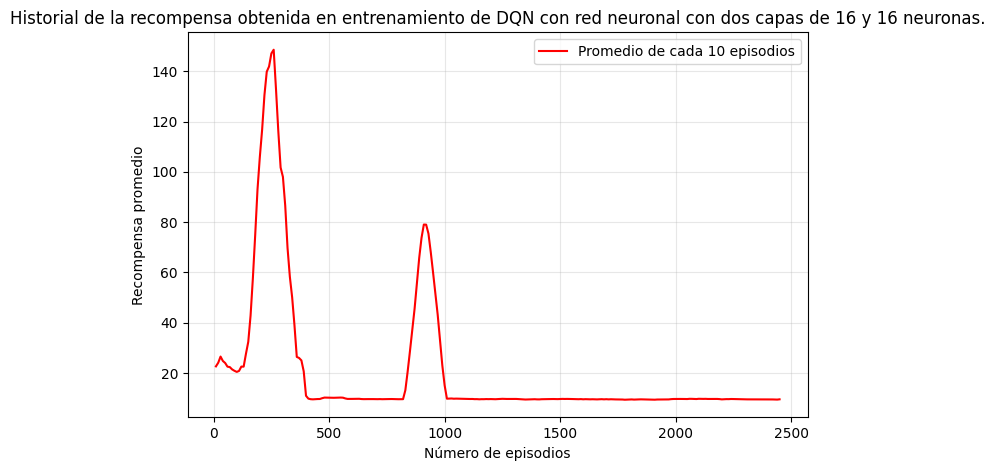

  warnings.warn(



---------------TEST---------------
Total Reward Episodio 1: 9.00
Total Reward Episodio 2: 9.00
Total Reward Episodio 3: 9.00
Total Reward Episodio 4: 9.00
Total Reward Episodio 5: 8.00
Total Reward Episodio 6: 9.00
Total Reward Episodio 7: 10.00
Total Reward Episodio 8: 10.00
Total Reward Episodio 9: 10.00
Total Reward Episodio 10: 10.00
Recompensa promedio: 9.30
Total Reward Video: 9.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
#Ejemplo DQN con arquitectura de [16,16] neuronas y 50,000 pasos de tiempo de entrenamiento
Train_Test_DQN(16,16,50000,"dqn1")

# Ejercicio práctico

En el anterior ejemplo, si se observa la curva de aprendizaje, puede observarse que la recompensa comenzó a crecer rápidamente y después de cierto punto la recompensa bajó y el algoritmo dejó de funcionar correctamente. Esto sugiere que ocurrió un <i>overfitting</i>. Esto ocurre en parte debido a la selección del parámetro $\gamma=1$. Para corregir este problema sin modificar este parámetro, se puede cambiar:
*   Cantidad de neuronas en cada capa.
*   Número de pasos de tiempo para el entrenamiento.

Primero, con la misma arquitectura del ejemplo, pruebe reducir la cantidad de pasos de tiempo a 15,000, y compare los resultados de la validación. Luego, puede variar el número de neuronas de cada capa entre 64 y 256, así como los pasos de entrenamiento entre 20,000 y 50,000, buscando la combinación que de el mejor resultado con el menor tiempo de ejecución posible.

In [ ]:
# Train y Test DQN con arquitectura [X,X] y X episodios por entrenamiento

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test DQN con arquitectura [X,X] y X episodios por entrenamiento

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test DQN con arquitectura [X,X] y X episodios por entrenamiento

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
--------------TRAIN--------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 1194     |
|    time_elapsed     | 0        |
|    total_timesteps  | 211      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 1055     |
|    time_elapsed     | 0        |
|    total_timesteps  | 402      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22      

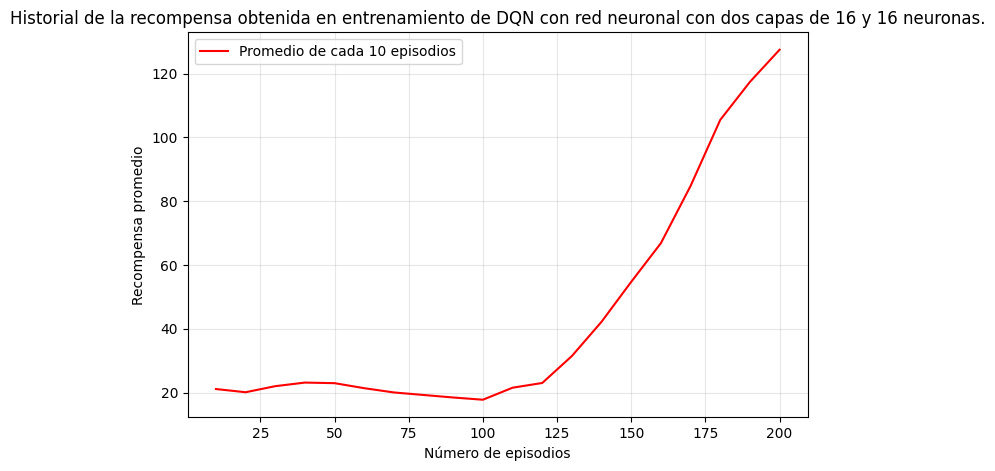

  warnings.warn(



---------------TEST---------------
Total Reward Episodio 1: 84.00
Total Reward Episodio 2: 74.00
Total Reward Episodio 3: 80.00
Total Reward Episodio 4: 80.00
Total Reward Episodio 5: 101.00
Total Reward Episodio 6: 101.00
Total Reward Episodio 7: 84.00
Total Reward Episodio 8: 69.00
Total Reward Episodio 9: 71.00
Total Reward Episodio 10: 77.00
Recompensa promedio: 82.10
Total Reward Video: 83.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test DQN con arquitectura [16,16] y 20,000 episodios por entrenamiento (sugerencia)
Train_Test_DQN(16,16,15000,"dqn001")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
--------------TRAIN--------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 6272     |
|    time_elapsed     | 0        |
|    total_timesteps  | 385      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 29.9     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 6128     |
|    time_elapsed     | 0        |
|    total_timesteps  | 597      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7    

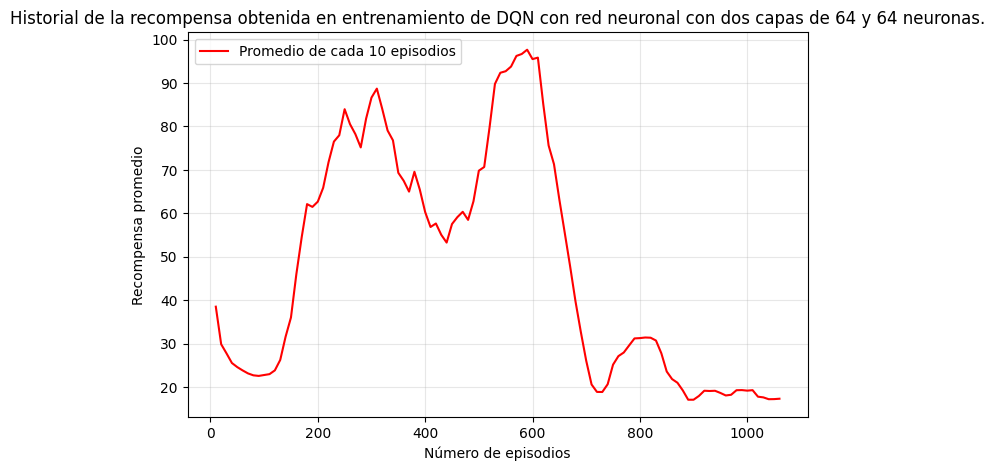

  warnings.warn(



---------------TEST---------------
Total Reward Episodio 1: 28.00
Total Reward Episodio 2: 31.00
Total Reward Episodio 3: 27.00
Total Reward Episodio 4: 25.00
Total Reward Episodio 5: 14.00
Total Reward Episodio 6: 24.00
Total Reward Episodio 7: 23.00
Total Reward Episodio 8: 25.00
Total Reward Episodio 9: 26.00
Total Reward Episodio 10: 19.00
Recompensa promedio: 24.20
Total Reward Video: 24.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test DQN con arquitectura [64,64] y 50,000 episodios por entrenamiento (sugerencia)
Train_Test_DQN(64,64,50000,"dqn002")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
--------------TRAIN--------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.976    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 3607     |
|    time_elapsed     | 0        |
|    total_timesteps  | 202      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.951    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 3936     |
|    time_elapsed     | 0        |
|    total_timesteps  | 409      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3    

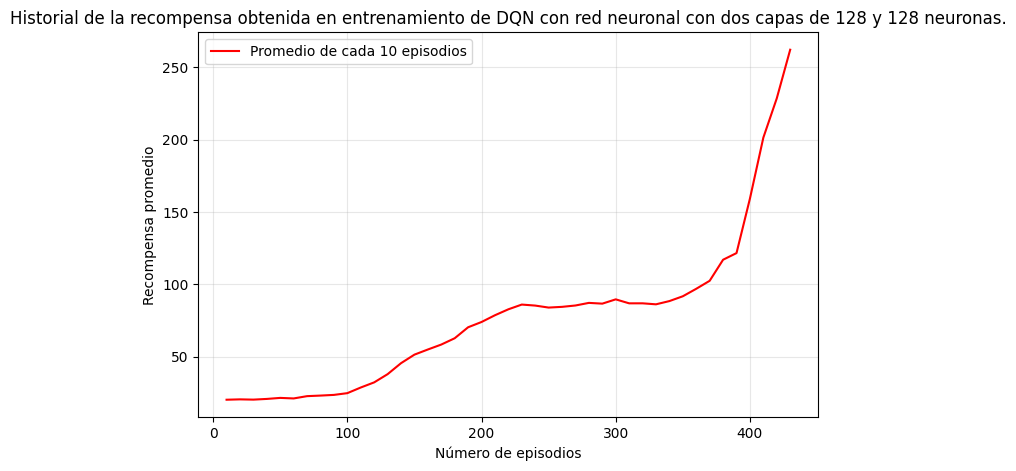

  warnings.warn(



---------------TEST---------------
Total Reward Episodio 1: 120.00
Total Reward Episodio 2: 131.00
Total Reward Episodio 3: 139.00
Total Reward Episodio 4: 130.00
Total Reward Episodio 5: 132.00
Total Reward Episodio 6: 132.00
Total Reward Episodio 7: 130.00
Total Reward Episodio 8: 134.00
Total Reward Episodio 9: 134.00
Total Reward Episodio 10: 132.00
Recompensa promedio: 131.40
Total Reward Video: 140.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test DQN con arquitectura [128,128] y 50,000 episodios por entrenamiento (sugerencia)
Train_Test_DQN(128,128,50000,"dqn003")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
--------------TRAIN--------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.4     |
|    ep_rew_mean      | 25.4     |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 10       |
|    fps              | 4213     |
|    time_elapsed     | 0        |
|    total_timesteps  | 254      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.944    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 4767     |
|    time_elapsed     | 0        |
|    total_timesteps  | 467      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.3    

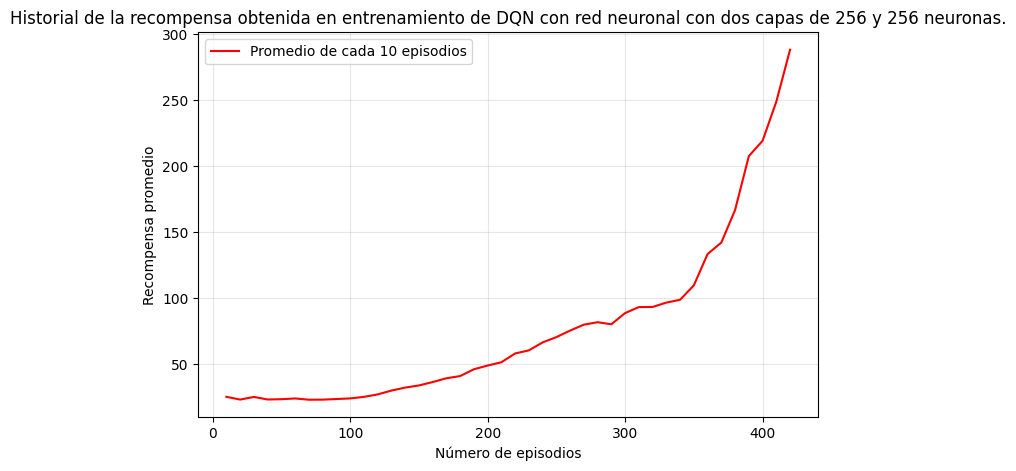

  warnings.warn(



---------------TEST---------------
Total Reward Episodio 1: 500.00
Total Reward Episodio 2: 500.00
Total Reward Episodio 3: 500.00
Total Reward Episodio 4: 500.00
Total Reward Episodio 5: 500.00
Total Reward Episodio 6: 500.00
Total Reward Episodio 7: 500.00
Total Reward Episodio 8: 500.00
Total Reward Episodio 9: 500.00
Total Reward Episodio 10: 500.00
Recompensa promedio: 500.00
Total Reward Video: 500.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
# Train y Test DQN con arquitectura [256,256] y 50,000 episodios por entrenamiento (sugerencia)
Train_Test_DQN(256,256,50000,"dqn004")

# Reflexiones Finales

Teniendo en cuenta sus propias pruebas con Q-Learning tabular y DQN con redes neuronales, específicamente el desempeño de los algoritmos en la validación y el tiempo de ejecución requerido, reflexione sobre las siguientes preguntas:


*   En la versión tabular, ¿es siempre mejor tener una discretización con muchos intervalos? ¿Cómo se relaciona esto con el número de episodios para el entrenamiento?

En general, si usamos una discretización esta debe ser elegida con base en nuestro conocimiento del problema. Se puede observar que en discretizaciones con pocos estados puede ser imposible obtener una política correcta independientemente de la cantidad de episodios utilizados en la etapa de entrenamiento. El caso contrario también puede ocurrir, si hay demasiados estados pueden ser necesarios muchos episodios para realizar un buen entrenamiento, resultando ser ineficiente y computacionalmente costoso. En general, se necesita un conocimiento apropiado del problema para poder fijar la cantidad suficiente de estados y que se pueda entrenar en una cantidad aceptable de episodios, lo cual es muy difícil en muchos casos y en otros puede que el resultado nunca llegue a ser perfecto.

*   En la versión de aproximación de funciones, ¿es siempre mejor usar muchas neuronas? ¿Es siempre mejor incrementar la cantidad de pasos de entrenamiento?

En la aproximación de funciones ocurre algo muy similar. Una cantidad pequeña de neuronas puede no ser suficiente para aproximar el problema, pero una cantidad muy grande puede requerir mayor tiempo de entrenamiento de forma innecesaria. No obstante, es más sencillo definir una arquitectura estándar y puede ser más intuitivo si el problema es difícil de dimensionar. Luego se pueden ajustar los pasos de entrenamiento hasta obtener resultados consistentes, con cuidado de no provocar problemas como el estancamiento de recompensa.

*   ¿Cómo se compara el desempeño de la versión tabular con la versión de aproximación de funciones?

En los experimentos tabulares es probable que se pueda encontrar una buena discretización que pueda ser entrenada en una cantidad de episodios aceptable, pero seguramente la recompensa obtenida no sea perfecta, y por ende la política hallada no sería del todo óptima. Al contrario, con una arquitectura de redes neuronales lo suficientemente grande y el suficiente tiempo de entrenamiento, la versión de aproximación de funciones puede ofrecer soluciones más robustas y mejores recompensas. Adicionalmente, hay que tener en cuenta que el método de aproximación de funciones con redes neuronales se adapta muy fácilmente a todo tipo de problemas, mientras que la discretización es casi única para cada ambiente. Por lo tanto, hay una ventaja en utilizar aproximación de funciones, ya que tiende a obtener mejores resultados de forma más confiable y se adapta muy fácilmente a gran variedad de problemas.  

*   ¿Cómo se compara el tiempo de ejecución de la versión tabular con la versión de aproximación de funciones?

Una red neuronal como las propuestas demora entre 1 y 2 minutos en ser entrenada con 50,000 pasos de tiempo, llegando a la política óptima en algunos casos con las suficientes neuronas. Este tiempo de entrenamiento es similar al utilizado con 10,000 episodios en la versión tabular, con lo cual también se puede llegar a una política similar. No obstante, este es un problema relativamente pequeño, con pocos estados y únicamente dos acciones; a medida que los problemas se hacen grandes, la discretización provoca que el tiempo de entrenamiento crezca considerablemente en comparación al tiempo de entrenamiento de redes neuronales de similar y diferente tamaño. Por ello en problemas de la vida real las redes neuronales serán probablemente más eficientes en términos de tiempo.


# Referencias

[1] Sutton, R. S. and Barto, A. G. (2018). Reinforcement Learning: An Introduction. The MIT Press, second edition.

[2] Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., and Riedmiller, M. (2013). Playing atari with deep reinforcement learning. cite arxiv:1312.5602Comment: NIPS Deep Learning Workshop 2013.

[3] Gym Documentation, Cart Pole. `https://www.gymlibrary.dev/environments/classic_control/cart_pole/`


[4] Stable Baselines3 Documentation, DQN. `https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html`